In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read the users.csv file
users_df = pd.read_csv('/data/ephemeral/home/data/users.csv')

# Display the first few rows to understand the data
print(users_df.head(30))

    user_id                            location   age
0         8            timmins, ontario, canada   NaN
1     11400             ottawa, ontario, canada  49.0
2     11676                       n/a, n/a, n/a   NaN
3     67544            toronto, ontario, canada  30.0
4     85526  victoria, british columbia, canada  36.0
5     96054             ottawa, ontario, canada  29.0
6    116866                           ottawa, ,   NaN
7    123629           kingston, ontario, canada   NaN
8    177458             ottawa, ontario, canada  29.0
9    200273             comber, ontario, canada   NaN
10   210926             guelph, ontario, canada   NaN
11   219008        halifax, nova scotia, canada  60.0
12   263325  fredericton, new brunswick, canada  27.0
13     2954                wichita, kansas, usa  71.0
14   152827             ottawa, ontario, canada  40.0
15    35704          kansas city, missouri, usa  53.0
16    83160            oregon city, oregon, usa  65.0
17   110912           milpit

In [19]:
users_df['country'] = users_df['country'].apply(lambda x: x if x not in ["n/a", ""] else np.nan)
users_df['state'] = users_df['state'].apply(lambda x: x if x not in ["n/a", ""] else np.nan)
users_df['city'] = users_df['city'].apply(lambda x: x if x not in ["n/a", ""] else np.nan)

In [20]:
for idx, row in users_df.iterrows():
        if (not pd.isna(row['state'])) and pd.isna(row['country']):
            fill_country = users_df[users_df['state'] == row['state']]['country'].mode()
            fill_country = fill_country[0] if len(fill_country) > 0 else np.nan
            users_df.loc[idx, 'country'] = fill_country
        elif (not pd.isna(row['city'])) and pd.isna(row['state']):
            if not pd.isna(row['country']):
                fill_state = users_df[(users_df['country'] == row['country']) 
                                    & (users_df['city'] == row['city'])]['state'].mode()
                fill_state = fill_state[0] if len(fill_state) > 0 else np.nan
                users_df.loc[idx, 'state'] = fill_state
            else:
                fill_state = users_df[users_df['city'] == row['city']]['state'].mode()
                fill_state = fill_state[0] if len(fill_state) > 0 else np.nan
                fill_country = users_df[users_df['city'] == row['city']]['country'].mode()
                fill_country = fill_country[0] if len(fill_country) > 0 else np.nan
                users_df.loc[idx, 'country'] = fill_country
                users_df.loc[idx, 'state'] = fill_state


/tmp/ipykernel_893729/1673894657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


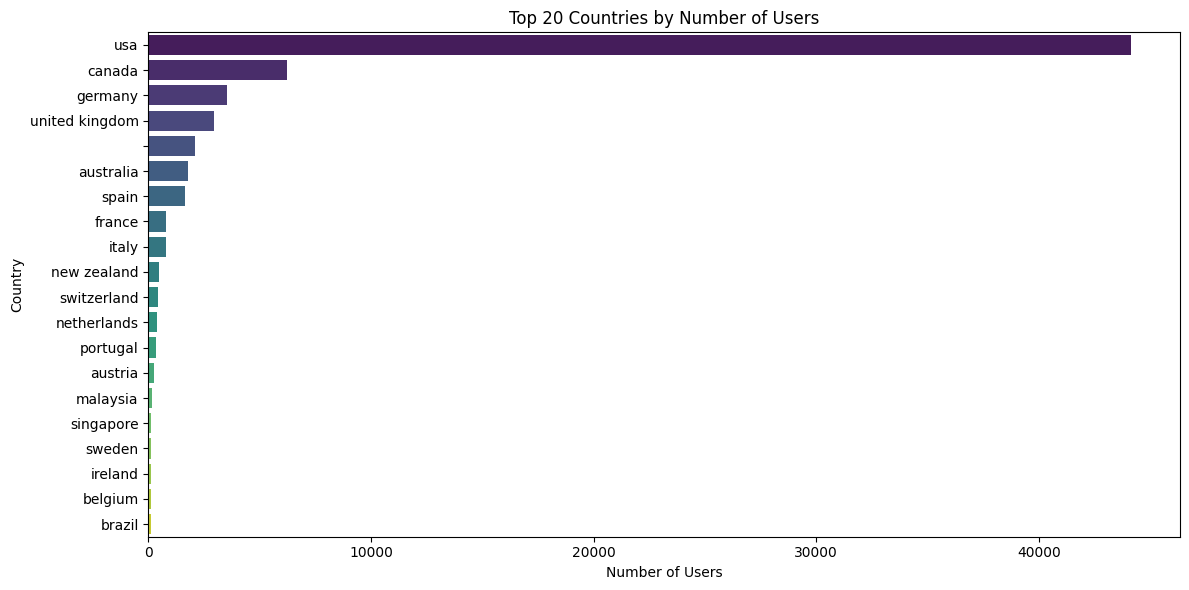

In [9]:
# Extract country from location (assuming format is city, state, country)
users_df['country'] = users_df['location'].str.split(',').str[-1].str.strip()

# Count the number of users per country
country_counts = users_df['country'].value_counts().head(20)  # Top 20 countries

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 20 Countries by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [13]:
# nan 처리 이전
print(users_df[users_df['country'] == ''].shape)

(2100, 5)


In [22]:
print(users_df["country"].isna().sum())

133



Missing values in location column: 0


/tmp/ipykernel_893729/2077274966.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


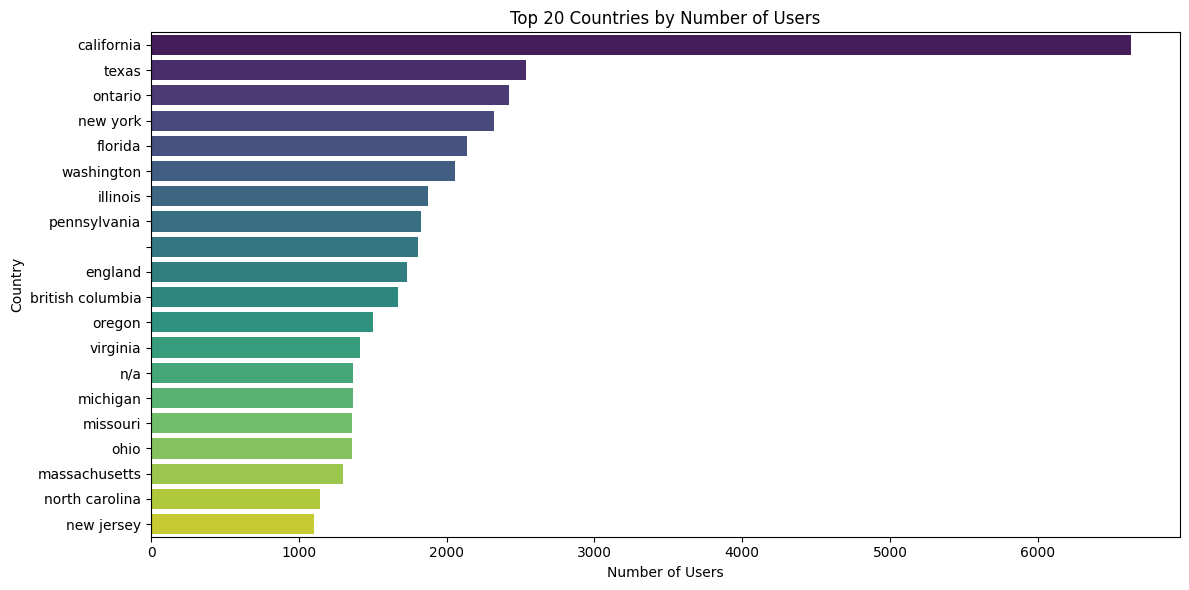

In [17]:
# Check for missing values in the location column
print("\nMissing values in location column:", users_df['location'].isnull().sum())

# Extract country from location (assuming format is city, state, country)
users_df['state'] = users_df['location'].str.split(',').str[1].str.strip()

# Count the number of users per country
country_counts = users_df['state'].value_counts().head(20)  # Top 20 countries

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 20 Countries by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [23]:
print(users_df["state"].isna().sum())

495


/tmp/ipykernel_893729/2998755009.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


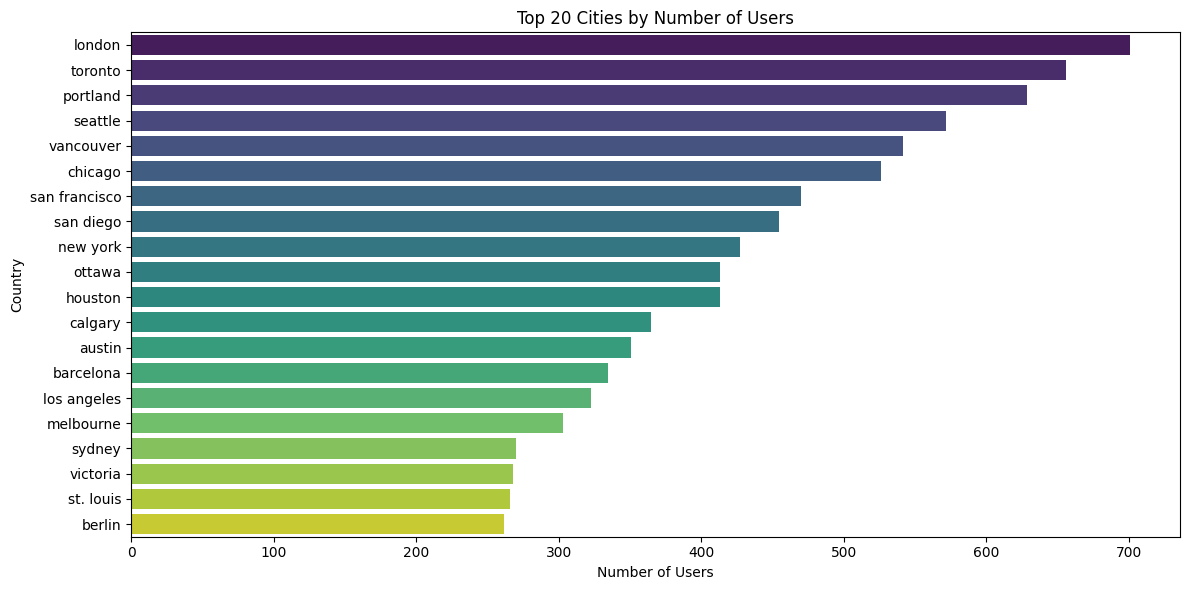

In [18]:
# Extract country from location (assuming format is city, state, country)
users_df['city'] = users_df['location'].str.split(',').str[0].str.strip()

# Count the number of users per country
country_counts = users_df['city'].value_counts().head(20)  # Top 20 countries

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 20 Cities by Number of Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [24]:
print(users_df["city"].isna().sum())

93


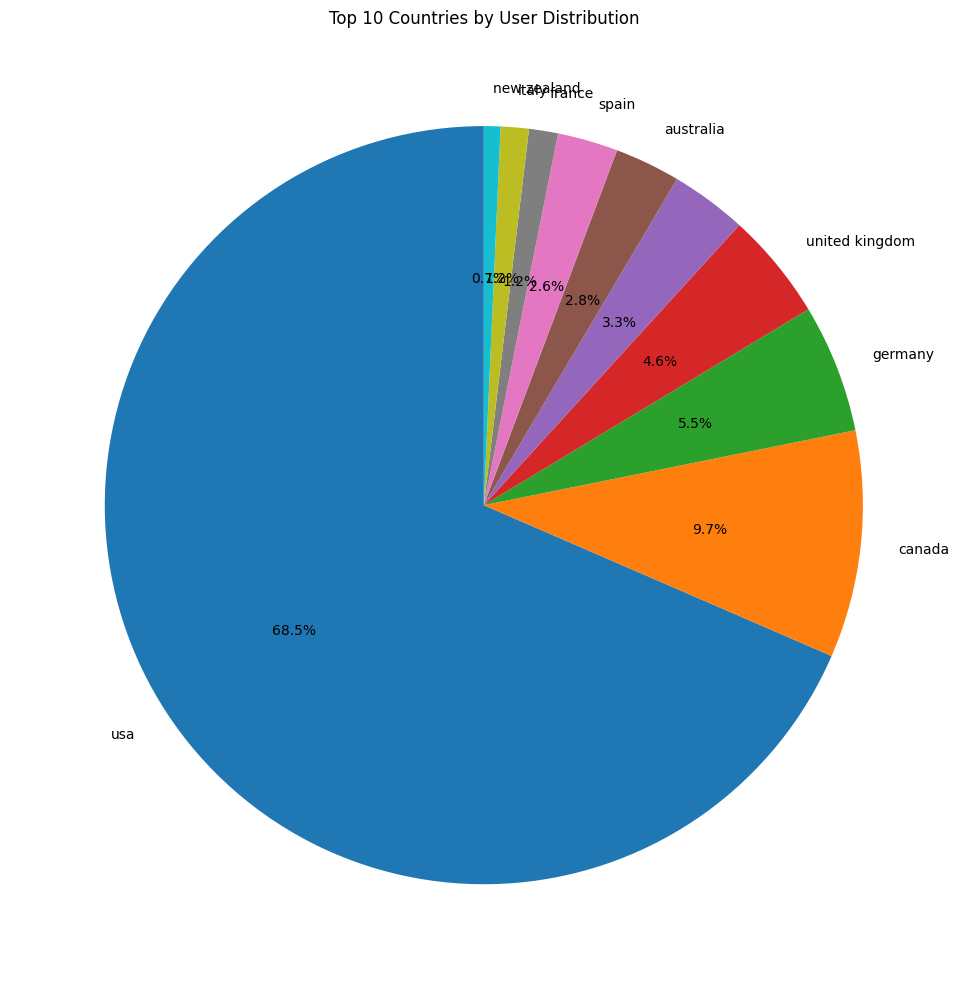

In [2]:
# For better visualization, let's also create a pie chart for the top 10 countries
plt.figure(figsize=(10, 10))
country_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Countries by User Distribution')
plt.ylabel('')  # Hide the y-label
plt.tight_layout()
plt.show()

In [3]:
train_df = pd.read_csv('/data/ephemeral/home/data/train_ratings.csv')
test_df = pd.read_csv('/data/ephemeral/home/data/test_ratings.csv')
sub = pd.read_csv('/data/ephemeral/home/data/sample_submission.csv')

all_df = pd.concat([train_df, test_df], axis=0)

sparse_cols = ['user_id', 'isbn']

# 라벨 인코딩하고 인덱스 정보를 저장
label2idx, idx2label = {}, {}
for col in sparse_cols:
    all_df[col] = all_df[col].fillna('unknown')
    unique_labels = all_df[col].astype("category").cat.categories
    label2idx[col] = {label:idx for idx, label in enumerate(unique_labels)}
    idx2label[col] = {idx:label for idx, label in enumerate(unique_labels)}
    train_df[col] = train_df[col].fillna('unknown').map(label2idx[col])
    test_df[col] = test_df[col].fillna('unknown').map(label2idx[col])

print(train_df.shape)

(306795, 3)


In [6]:
print(train_df.duplicated(subset=['user_id', 'isbn']).sum())

0


In [5]:
train_df['rating'].value_counts()

rating
8     73593
7     52928
9     48673
10    42774
6     25311
5     14111
1     13249
2     12929
4     12707
3     10520
Name: count, dtype: int64

In [29]:
def smart_round(x):
    """
    x: pandas Series 또는 numpy array
    - 소수점 <= 0.2 -> 내림 (floor)
    - 소수점 >= 0.8 -> 올림 (ceil)
    - 그 외(0.2~0.8) -> 유지
    """
    # 1. 소수점 부분만 추출 (예: 7.84 -> 0.84)
    fraction = x % 1
    
    # 2. 조건에 따라 값 변경 (np.where 중첩 사용)
    # 로직: (0.2 이하면 내림?) 아니면 -> (0.8 이상이면 올림?) 아니면 -> 원래 값
    result = np.where(fraction <= 0.1, np.floor(x), 
                      np.where(fraction >= 0.9, np.ceil(x), x))
    
    return result

In [30]:
test = pd.read_csv("/data/ephemeral/home/saved/submit/output5.csv")

test["rating"] = test["rating"].apply(smart_round)

test.to_csv("/data/ephemeral/home/saved/submit/output6.csv", index=False)

In [3]:
# Read the books.csv file
books_df = pd.read_csv('/data/ephemeral/home/data/books.csv')

# Display the first few rows to understand the data
print(books_df.head(30))

          isbn                                         book_title  \
0   0002005018                                       Clara Callan   
1   0060973129                               Decision in Normandy   
2   0374157065  Flu: The Story of the Great Influenza Pandemic...   
3   0399135782                             The Kitchen God's Wife   
4   0425176428  What If?: The World's Foremost Military Histor...   
5   0671870432                                    PLEADING GUILTY   
6   074322678X            Where You'll Find Me: And Other Stories   
7   0771074670                        Nights Below Station Street   
8   0887841740                                 The Middle Stories   
9   1552041778                                           Jane Doe   
10  1558746218  A Second Chicken Soup for the Woman's Soul (Ch...   
11  1567407781       The Witchfinder (Amos Walker Mystery Series)   
12  1575663937  More Cunning Than Man: A Social History of Rat...   
13  1881320189                    

In [ ]:
print(books_df['category'].isna().sum())
print(books_df['summary'].isna().sum())

# 카테고리랑 줄거리가 같이 없는 경우, 줄거리 없으면 카테고리도 없는 것으로 보임
print(books_df[['category', 'summary']].isna().all(axis=1).sum())

68851
67227
67227


In [4]:
print(books_df['category'].value_counts()[:10])

category
['Fiction']                      32956
['Juvenile Fiction']              5804
['Biography & Autobiography']     3320
['History']                       1925
['Religion']                      1818
['Juvenile Nonfiction']           1417
['Social Science']                1231
['Humor']                         1161
['Body, Mind & Spirit']           1109
['Business & Economics']          1070
Name: count, dtype: int64
